# <b> Chapter 4

In [5]:
from typing import List
from numbers import Number
from typing import Self
from functools import reduce
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import matplotlib

random.seed(23)

In [8]:
# Defining functions to work with vectors

# NOTE: This is NOT meant to be performatic, its meant for practicing
# NOTE: Although Vector is a subclass of ndarray, I opted for not using its built-in methods.


class Vector(np.ndarray):
    """Defines a new 1D type array (Vector)"""

    def __new__(self, l: List[Number] = [], type=np.float64) -> Self:
        """Instatiates a new Vector, in which flattens any ndarray"""
        obj = np.asarray(l, dtype=type).view(self)
        if obj.ndim != 1:
            return obj.flatten()
        obj._direction = (0, 0)
        return obj

    def vect_sum(self, w: Self) -> Self:
        """Calculates the addition of two Vectors"""
        assert len(self) == len(w), "Vectors must have same length"
        z = Vector([a + b for a, b in zip(self, w)])
        z.direction = tuple(map(sum, (zip(self.direction, w.direction))))
        return z

    def vect_dif(self, w: Self) -> Self:
        """Calculates the subtractaction of two Vectors"""
        assert len(self) == len(w), "Vectors must have same length"
        z = Vector([a - b for a, b in zip(self, w)])
        z.direction = tuple(map(sum, (zip([-e for e in self.direction],  w.direction))))
        return z

    def add(self, n: Number) -> Self:
        """Calculates the addition of a scalar number to a Vector"""
        assert isinstance(n, Number), "Argument 2 must be a scalar number"
        return Vector([(lambda x: x + n)(x) for x in self])

    def subtract(self, n: Number) -> Self:
        """Calculates the subtraction of a scalar number to a Vector"""
        assert isinstance(n, Number), "Argument 2 must be a scalar number"
        return Vector([(lambda x: x - n)(x) for x in self])

    def multiply(self, n: Number) -> Self:
        """Calculates the multiplication of a scalar number to a Vector"""
        return Vector([(lambda x: x * n)(x) for x in self])

    def sum(self) -> Number:
        """Calculates the sum of all elements of a Vector"""
        return sum(self)

    def mean(self) -> Number:
        """Calculates the mean of all elements of a Vector"""
        return self.sum() / len(self)

    def dot(self, w: Self) -> Number:
        """Calculates v[0] * w[0] + ... + v[n] * w[n]"""
        assert len(self) == len(w), "Vectors must be same length"
        return sum(x * y for x, y in zip(self, w))

    def sum_of_squares(self) -> Number:
        """Calculates v[0] * v[0] + ... + v[n] * v[n]"""
        return self.dot(self)

    def magnitude(self) -> Number:
        """Calculates the lenght of a Vector"""
        return math.sqrt(self.sum_of_squares())

    def squared_distance(self, w: Self) -> Number:
        """Calculates (v[1] - w[1]) ** 2 + ... + (v[n] - w[n]) ** 2"""
        return self.sum_of_squares(self.vect_dif(w))

    def distance(self, w: Self) -> Number:
        """Calculates the distance between two vectors"""
        return self.vect_dif(w).magnitude()

    @property
    def direction(self):
        return self._direction

    @direction.setter
    def direction(self, d: List[Number]) -> None:
        try:
            d = tuple(d)
        except:
            TypeError("Arguments are not numbers or array type")
        assert len(d) == 2, "Direction only takes two arguments."
        assert all(isinstance(x, Number) for x in d), "Direction must be a Number type"
        self._direction = d

## Vectors

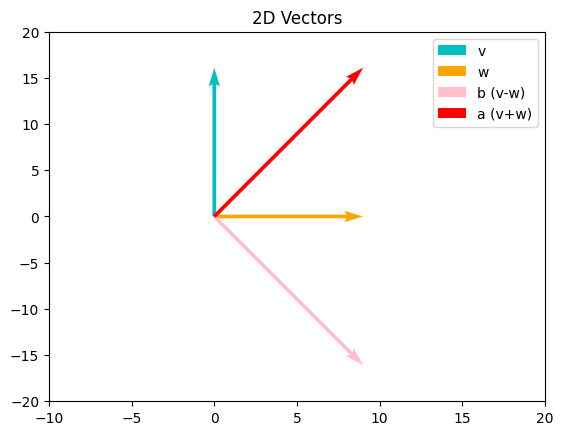

In [7]:
# Creating and plotting two 2D vectors

v = Vector([0, 0])
w = Vector([0, 0])

v.direction = (0, 15)
w.direction = (15, 0)


a = v.vect_sum(w)
b = v.vect_dif(w)

fig, ax = plt.subplots()
ax.axis([-20, 20, -20, 20])
ax.set_xlim(-10)
plt.quiver(*v, *v.direction, scale=50, color="c")
plt.quiver(*w, *w.direction, scale=50, color="orange")
plt.quiver(*b, *b.direction, scale=50, color="pink")
plt.quiver(*a, *a.direction, scale=50, color="red")
plt.title("2D Vectors")
plt.legend(['v', 'w', 'b (v-w)', 'a (v+w)'])
plt.show()